Enter the binary numbers: 10101110010
NRZ-L: 0 1 0 1 0 0 0 1 1 0 1
NRZ-I: 1 1 0 0 1 0 1 1 1 0 0
Manchester: 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0
Bipolar-AMI: 1 0 -1 0 1 -1 1 0 0 -1 0
Differential Manchester: 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1
Unipolar: 1 0 1 0 1 1 1 0 0 1 0
Polar: 1 -1 1 -1 1 1 1 -1 -1 1 -1


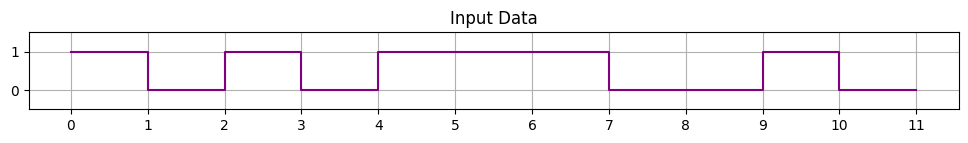

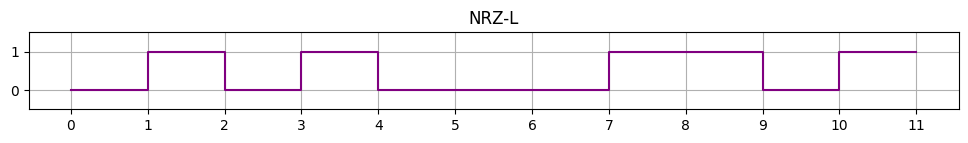

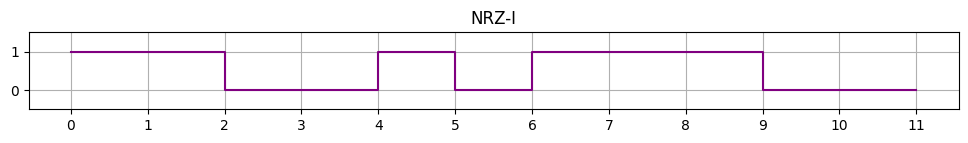

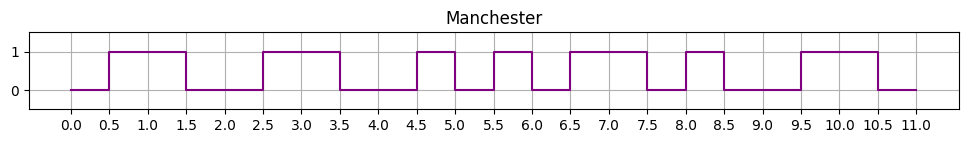

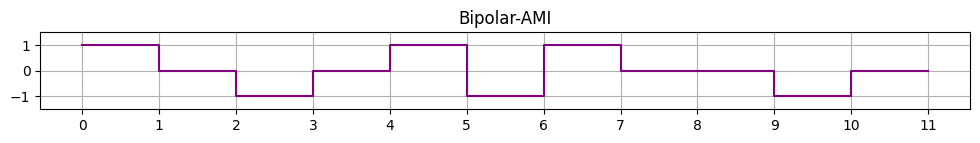

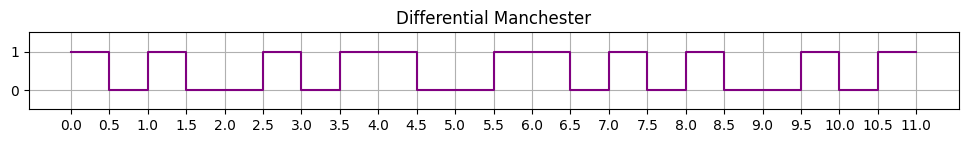

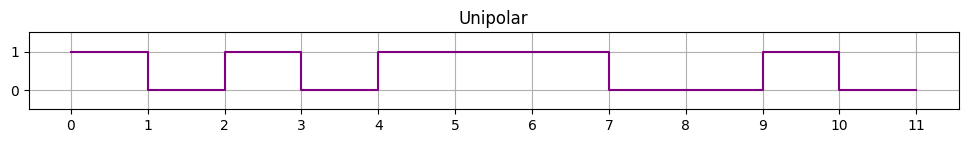

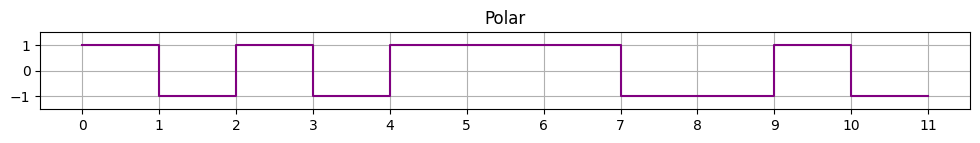

In [1]:
import matplotlib.pyplot as plt
from scipy.signal import welch


# Function to print the encoded signal for visualization and debugging purposes
def print_enc(name, encoding):
   print(f"{name}: {' '.join(map(str, encoding))}")


# NRZ-L (Non-Return-to-Zero Level) encoding: 0 is mapped to 1, 1 is mapped to 0
def nrzL(data):
   return [1 if bit == 0 else 0 for bit in data]


# NRZ-I (Non-Return-to-Zero Inverted) encoding: transitions occur on 1, no change on 0
def nrzI(data):
   encoded = []
   last_level = 0  # Start at 0 level
   for bit in data:
       if bit == 1:
           last_level = 1 - last_level  # Invert on 1
       encoded.append(last_level)
   return encoded


# Manchester encoding: 1 is represented by [0,1], 0 is represented by [1,0]
def manchester(data):
   encoded = []
   for bit in data:
       if bit == 1:
           encoded.extend([0, 1])
       else:
           encoded.extend([1, 0])
   return encoded


# Bipolar-AMI (Alternate Mark Inversion) encoding: 1s alternate between +1 and -1, 0 is represented by 0
def bipolar_ami(data):
   encoded = []
   last_pulse = -1  # Keeps track of the last pulse direction
   for bit in data:
       if bit == 1:
           last_pulse = -last_pulse  # Alternate between +1 and -1
           encoded.append(last_pulse)
       else:
           encoded.append(0)  # 0 is neutral (0 level)
   return encoded


# Differential Manchester encoding: 0 causes no transition at the start of the bit, 1 causes a transition
def differential_manchester(data):
   encoded = []
   last_level = 0  # Initial level is 0
   for bit in data:
       if bit == 0:
           encoded.extend([last_level, 1 - last_level])  # No transition on 0
       else:
           last_level = 1 - last_level  # Transition on 1
           encoded.extend([last_level, 1 - last_level])
   return encoded


# Unipolar encoding: straightforward 1 -> 1, 0 -> 0
def unipolar(data):
   return [1 if bit == 1 else 0 for bit in data]


# Polar encoding: 1 -> +1, 0 -> -1
def polar(data):
   return [1 if bit == 1 else -1 for bit in data]


# Function to visualize the signal encoding with graphs
def visualize(name, data, encoding, is_manchester=False):
   plt.figure(figsize=(12, 1))
   plt.title(name)  # Plot title for the encoding scheme


   # Manchester encoding requires double the x-values since each bit is split into two
   if is_manchester:
       x_values = [0.5 * i for i in range(len(encoding) + 1)]
   else:
       x_values = range(len(encoding) + 1)


   # Plotting the encoding as a step function
   plt.step(x_values, encoding + [encoding[-1]], where='post', linestyle='-', color='purple', linewidth=1.5)


   # Adjust y-axis for encodings like Bipolar and Polar which use negative values
   if "Bipolar" in name or "Polar" in name:
       plt.ylim(-1.5, 1.5)  # Y-axis range for bipolar and polar encodings
       plt.yticks([-1, 0, 1])
   else:
       plt.ylim(-0.5, 1.5)  # Y-axis for unipolar encodings
       plt.yticks([0, 1])


   # Adjust x-axis ticks for Manchester encoding (since each bit is split into two)
   if is_manchester:
       plt.xticks([0.5 * i for i in range(len(data) * 2 + 1)])
   else:
       plt.xticks(range(len(data) + 1))


   plt.grid(True)  # Add grid for better readability
   plt.show()  # Display the plot


# Function to plot the power spectral density of the encoded signal
def plot_spectral_density(name, encoding, is_manchester=False):
   fs = 2.0 if is_manchester else 1.0  # Set sampling frequency, higher for Manchester due to double bits


   # Calculate the power spectral density using Welch's method
   f, Pxx = welch(encoding, fs=fs, nperseg=len(encoding))


   # Plot the spectral density
   plt.figure(figsize=(12, 4))
   plt.semilogy(f, Pxx, label=name)  # Use log scale for better visualization
   plt.title(f'Spectral Density of {name}')
   plt.xlabel('Frequency [Hz]')
   plt.ylabel('Power Spectral Density [V^2/Hz]')
   plt.grid(True)
   plt.legend()
   plt.show()


# Function to plot the merged spectral density for multiple encoding schemes (optional feature)
def plot_merged_spectral_density(encodings, names, is_manchester_flags):
   plt.figure(figsize=(12, 6))


   for encoding, name, is_manchester in zip(encodings, names, is_manchester_flags):
       fs = 2.0 if is_manchester else 1.0  # Adjust sampling frequency based on encoding


       # Skip plotting for flat signals (e.g., NRZ for all 1s) as they have no meaningful spectrum
       if all(x == encoding[0] for x in encoding):
           continue


       f, Pxx = welch(encoding, fs=fs, nperseg=len(encoding))
       plt.semilogy(f, Pxx, label=name)  # Plot each spectral density


   plt.show()


# Main function to execute encoding and visualization
def main():
   # Get custom binary input from the user
   data = [int(x) for x in input(f"Enter the binary numbers: ").strip()]


   # Generate the encoded signals for different encoding schemes
   nrzl_enc = nrzL(data)
   nrzi_enc = nrzI(data)
   man_enc = manchester(data)
   bi_enc = bipolar_ami(data)
   diff_enc = differential_manchester(data)
   uni_enc = unipolar(data)
   polar_enc = polar(data)


   # Print the encoded signals
   print_enc("NRZ-L", nrzl_enc)
   print_enc("NRZ-I", nrzi_enc)
   print_enc("Manchester", man_enc)
   print_enc("Bipolar-AMI", bi_enc)
   print_enc("Differential Manchester", diff_enc)
   print_enc("Unipolar", uni_enc)
   print_enc("Polar", polar_enc)


   # Visualize the input data first
   visualize("Input Data", data, data)


   # Visualize each encoding scheme
   visualize("NRZ-L", data, nrzl_enc)
   visualize("NRZ-I", data, nrzi_enc)
   visualize("Manchester", data, man_enc, is_manchester=True)
   visualize("Bipolar-AMI", data, bi_enc)
   visualize("Differential Manchester", data, diff_enc, is_manchester=True)


   # Visualize additional Unipolar and Polar encodings
   visualize("Unipolar", data, uni_enc)
   visualize("Polar", data, polar_enc)




# Ensure the script runs only when executed directly
if __name__ == "__main__":
   main()

# 10101110010

<ipython-input-2-9b8ee9a95574>:24: RuntimeWarning: invalid value encountered in power
  return (np.sinc(f_R) * np.sin(np.pi * f_R / 2))**1.4
<ipython-input-2-9b8ee9a95574>:30: RuntimeWarning: invalid value encountered in power
  return (np.sinc(f_R) * np.sin(np.pi * f_R / 2))**1.424


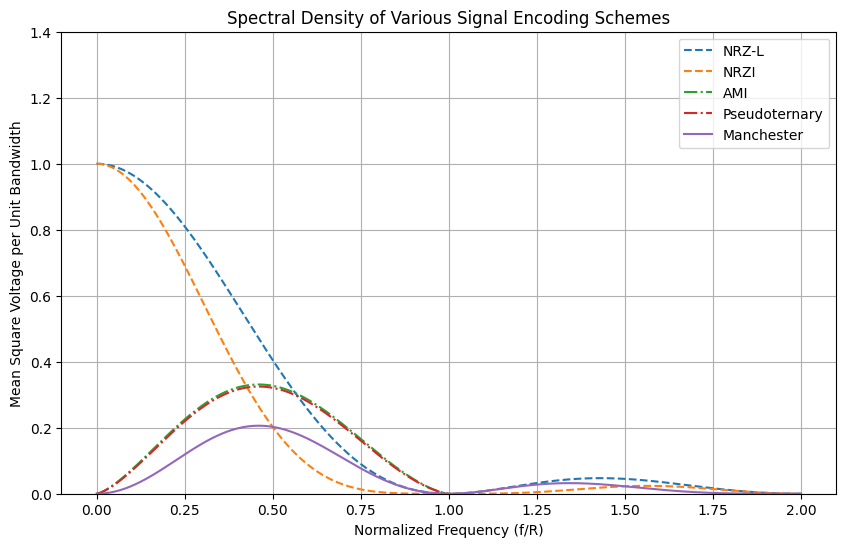

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Define the normalized frequency range from 0 to 2 (with 500 points)
f_R = np.linspace(0, 2, 500)


# Define the spectral density function for NRZ-L encoding
def spectral_nrz_l(f_R):
   # The power spectral density of NRZ-L follows the sinc squared function
   return np.sinc(f_R)**2


# Define the spectral density function for NRZ-I encoding
def spectral_nrz_i(f_R):
   # NRZ-I spectral density is derived from NRZ-L with an additional cosine factor
   return np.sinc(f_R)**2 * (1 + np.cos(np.pi * f_R)) / 2


# Define the spectral density function for Bipolar-AMI encoding
def spectral_bipolar_ami(f_R):
   # Bipolar-AMI spectral density is a modified version of the sinc function
   return (np.sinc(f_R) * np.sin(np.pi * f_R / 2))**1.4


# Define the spectral density function for Pseudoternary encoding
def spectral_pseudoternary(f_R):
   # Pseudoternary is similar to AMI but with a slight difference in the exponent
   return (np.sinc(f_R) * np.sin(np.pi * f_R / 2))**1.424


# Define the spectral density function for Manchester encoding
def spectral_manchester(f_R):
   # Manchester encoding has a squared sinc function with a sin term
   return (np.sinc(f_R) * np.sin(np.pi * f_R / 2))**2


# Define the spectral density function for Differential Manchester encoding
def spectral_differential_manchester(f_R):
   # Differential Manchester uses a sinc function applied to half the frequency
   return np.sinc(f_R / 2)**2 * np.sinc(f_R / 2)**2


# Plot the spectral densities for all encoding schemes
plt.figure(figsize=(10, 6))  # Create a figure with a specific size


# Plot each spectral density with its respective label and linestyle
plt.plot(f_R, spectral_nrz_l(f_R), label='NRZ-L', linestyle='--')
plt.plot(f_R, spectral_nrz_i(f_R), label='NRZI', linestyle='--')
plt.plot(f_R, spectral_bipolar_ami(f_R), label='AMI', linestyle='-.')
plt.plot(f_R, spectral_pseudoternary(f_R), label='Pseudoternary', linestyle='-.')
plt.plot(f_R, spectral_manchester(f_R), label='Manchester')
# Optionally plot Differential Manchester (commented out)
# plt.plot(f_R, spectral_differential_manchester(f_R), label='Differential Manchester')


# Add title and labels to the plot
plt.title('Spectral Density of Various Signal Encoding Schemes')
plt.xlabel('Normalized Frequency (f/R)')
plt.ylabel('Mean Square Voltage per Unit Bandwidth')


# Add a legend, grid, and set y-axis limits for better visualization
plt.legend()
plt.grid(True)
plt.ylim(0, 1.4)


# Display the plot
plt.show()
